## Practical 2
### Vaibhav Singhavi
### Roll Number: 64


In [2]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic as GD


In [25]:
import time

In [43]:

geolocator = Nominatim(user_agent="primsAlgo")
n=int(input("Number of cities"))
list=[]
for i in range(n):
    list.append(input("Enter the City"))

In [44]:
list

['Mumbai',
 'Pune',
 'Nashik',
 'Delhi',
 'Chennai',
 'Hyderabad',
 'Kashmir',
 'Kanyakumari']

In [45]:
city=[]
latitude=[]
longitude=[]
for i in range(n):
  location = geolocator.geocode(list[i])
  latitude.append(location.latitude)
  longitude.append(location.longitude)
for j in range(n):
  city.append((latitude[j], longitude[j]))

In [46]:
latitude

[19.0785451,
 18.521428,
 20.0112475,
 28.6273928,
 13.0836939,
 17.360589,
 26.2644203,
 8.079252]

In [47]:
longitude

[72.878176,
 73.8544541,
 73.7902364,
 77.1716954,
 80.270186,
 78.4740613,
 71.6027498,
 77.5499338]

In [48]:
print("Cities and their Latitudes and Longitudes: \n",city)

Cities and their Latitudes and Longitudes: 
 [(19.0785451, 72.878176), (18.521428, 73.8544541), (20.0112475, 73.7902364), (28.6273928, 77.1716954), (13.0836939, 80.270186), (17.360589, 78.4740613), (26.2644203, 71.6027498), (8.079252, 77.5499338)]


In [49]:
import numpy as np
Out=[]
for i in range(n):
  dist=[]
  for j in range(n):
    d=(GD(city[i],city[j]).miles)
    dist.append(d)
  Out.append(dist)
# Creating NumPy array
arr = np.array(Out)

# Reshaping array to n x m matrix
res = arr.reshape(n, n)

# printing result
print("Constructed Matrix : \n" + str(res))

Constructed Matrix : 
[[   0.           74.55029367   87.48224083  710.95085794  641.18830673
   386.26777265  501.11633842  818.62569311]
 [  74.55029367    0.          102.55989455  726.49505114  567.48633652
   314.39083762  551.87869841  759.62018048]
 [  87.48224083  102.55989455    0.          630.08313588  641.35399163
   357.02193638  452.2356447   858.10404144]
 [ 710.95085794  726.49505114  630.08313588    0.         1087.82745552
   779.7259724   378.74927097 1413.55848317]
 [ 641.18830673  567.48633652  641.35399163 1087.82745552    0.
   317.55492766 1067.23679562  390.51819811]
 [ 386.26777265  314.39083762  357.02193638  779.7259724   317.55492766
     0.          754.70860026  641.05530938]
 [ 501.11633842  551.87869841  452.2356447   378.74927097 1067.23679562
   754.70860026    0.         1310.3393595 ]
 [ 818.62569311  759.62018048  858.10404144 1413.55848317  390.51819811
   641.05530938 1310.3393595     0.        ]]


In [50]:
dist

[818.6256931085393,
 759.6201804808603,
 858.1040414430607,
 1413.5584831654965,
 390.5181981074684,
 641.0553093816167,
 1310.3393594994695,
 0.0]

In [51]:
Out

[[0.0,
  74.55029367126821,
  87.48224082988995,
  710.9508579433975,
  641.1883067323678,
  386.2677726478118,
  501.1163384173603,
  818.6256931085393],
 [74.55029367126821,
  0.0,
  102.55989455322408,
  726.4950511428258,
  567.4863365210285,
  314.39083762393216,
  551.8786984064525,
  759.6201804808603],
 [87.48224082988995,
  102.55989455322408,
  0.0,
  630.0831358792143,
  641.3539916286844,
  357.0219363811122,
  452.23564470222885,
  858.1040414430607],
 [710.9508579433975,
  726.4950511428258,
  630.0831358792143,
  0.0,
  1087.8274555213395,
  779.725972401886,
  378.7492709677155,
  1413.5584831654965],
 [641.1883067323678,
  567.4863365210285,
  641.3539916286844,
  1087.8274555213395,
  0.0,
  317.5549276648711,
  1067.236795615501,
  390.5181981074684],
 [386.2677726478118,
  314.39083762393216,
  357.0219363811122,
  779.725972401886,
  317.5549276648711,
  0.0,
  754.7086002586992,
  641.0553093816167],
 [501.1163384173603,
  551.8786984064525,
  452.23564470222885,


In [23]:
def Prims(graph, n):
    INF = 999999
    dist = [INF] * n
    visited = [False] * n
    dist[0] = 0
    count = 0

    while count < n - 1:
        u = min_distance(dist, visited)
        visited[u] = True
        count2 = 0

        while count2 < n:
            if graph[u][count2] != 0 and not visited[count2] and graph[u][count2] < dist[count2]:
                dist[count2] = graph[u][count2]
            count2 += 1

        count += 1

    return dist

def min_distance(dist, visited):
    min_dist = float('inf')
    min_index = -1

    for i in range(len(dist)):
        if dist[i] < min_dist and not visited[i]:
            min_dist = dist[i]
            min_index = i

    return min_index

In [24]:
mst=Prims(res,n)
mst

[0, 74.55029367126821, 385.2763086761522, 604.0116160731279, 528.4452755108051]

In [52]:
start=time.perf_counter()
mst=Prims(res,n)
print(mst)
end= time.perf_counter()
timetaken=end-start

[0, 74.55029367126821, 87.48224082988995, 378.7492709677155, 317.5549276648711, 314.39083762393216, 452.23564470222885, 390.5181981074684]


In [53]:
print("Time Taken: ",timetaken)

Time Taken:  0.000826000003144145


In [29]:
time_for_5 = timetaken

In [42]:
time_for_10 = timetaken

In [54]:
time_for_8=timetaken

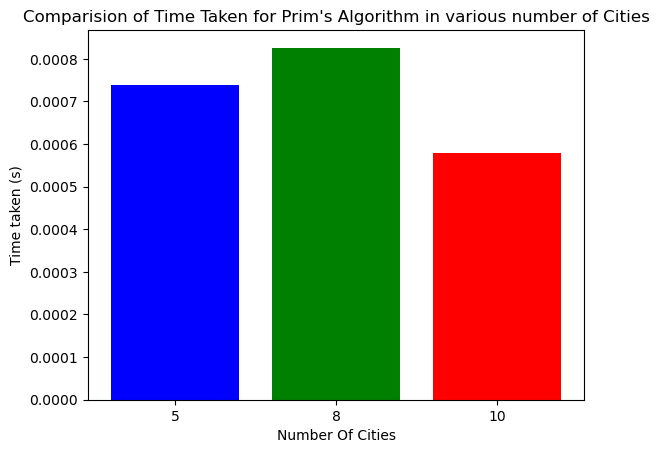

In [55]:
import matplotlib.pyplot as plt

labels = ["5", "8", "10"]
times = [ time_for_5,time_for_8,time_for_10]

# Define custom colors for each bar
colors = ["blue", "green","red"]

plt.bar(labels, times, color=colors)
plt.xlabel("Number Of Cities")
plt.ylabel("Time taken (s)")
plt.title("Comparision of Time Taken for Prim's Algorithm in various number of Cities")
plt.show()